# AERO3660: Assignment 2 2023
**Samuel Shelton z5359712**

In [1]:
from datetime import datetime
print('This cell last executed at: ', datetime.now())

This cell last executed at:  2023-03-08 15:02:57.992870


## Question 2

In [5]:
from scipy import constants

MTOW = 2558 # kg
g = scipy.constants.g
V = 73.0396 # m s^-1
rho = 0.993195 # kg m^-3

mu = 1.727e-5 # Pa S

In [8]:
# Calculating MAC

rc = 2.56 # Root Chord
t = 0.4 # Taper Ratio

MAC = rc * ( 2 / 3 ) * ( ( 1 + t + t**2 ) / (1 + t))

print(MAC)

1.9017142857142857


In [10]:
# Calculating cruising Reynolds Number

Re = rho * V * MAC / mu

print(Re)

7988143.206459292


## XFOIL Data Processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def readAirfoilCSV(path):
    return pd.read_csv(path, delimiter=',', header=9)

NACA2412 = readAirfoilCSV('XFOIL Data/xf-naca2412-il-1000000.csv')
NACA2415 = readAirfoilCSV('XFOIL Data/xf-n2415-il-1000000-n5.csv')
NACA23012 = readAirfoilCSV('XFOIL Data/xf-naca23012-il-1000000-n5.csv')
NACA23015 = readAirfoilCSV('XFOIL Data/xf-naca23015-il-1000000-n5.csv')
NACA652415 = readAirfoilCSV('XFOIL Data/xf-naca652415-il-1000000-n5.csv')

Airfoils = [NACA2412, NACA2415, NACA23012, NACA23015, NACA652415]
Airfoil_names = ['NACA 2412', 'NACA 2415', 'NACA 23012', 'NACA 23015', 'NACA 65$_2$-415']

/var/folders/l_/9d2vdrhj63n0sgtgpvt0vmgc0000gn/T/ipykernel_97568/601730154.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CL_v_alpha.png', transparent=True, DPI=600)


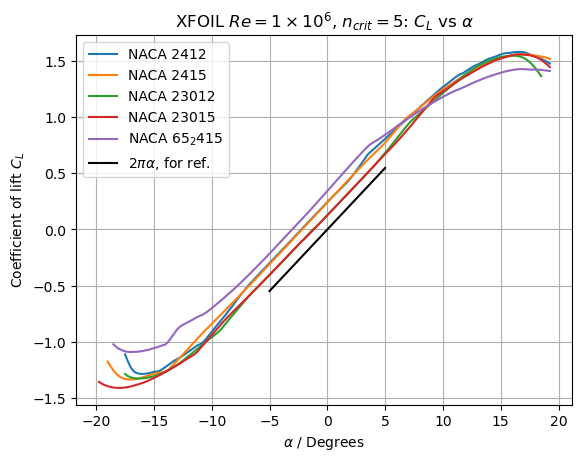

In [11]:
plt.plot(NACA2412['Alpha'], NACA2412['Cl'], label='NACA 2412')
plt.plot(NACA2415['Alpha'], NACA2415['Cl'], label='NACA 2415')
plt.plot(NACA23012['Alpha'], NACA23012['Cl'], label='NACA 23012')
plt.plot(NACA23015['Alpha'], NACA23015['Cl'], label='NACA 23015')
plt.plot(NACA652415['Alpha'], NACA652415['Cl'], label='NACA 65$_2$415')

x = np.linspace(-5,5,10)
plt.plot(x, 2*np.pi*x*np.pi/180, label='$ 2 \pi \\alpha$, for ref.', color='black')

plt.title('XFOIL $Re = 1 \\times 10^6$, $n_{crit} = 5$: $C_L$ vs $\\alpha$')
plt.xlabel('$\\alpha$ / Degrees')
plt.ylabel('Coefficient of lift $C_L$')

#plt.xlim((-3.1, -1))
#plt.ylim(0, 0.1)

plt.legend()
plt.grid()

plt.savefig('CL_v_alpha.png', transparent=True, DPI=600)
plt.savefig('CL_v_alpha.pdf', transparent=True)

/var/folders/l_/9d2vdrhj63n0sgtgpvt0vmgc0000gn/T/ipykernel_97568/1733847303.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('cD_v_alpha.png', transparent=True, DPI=600)


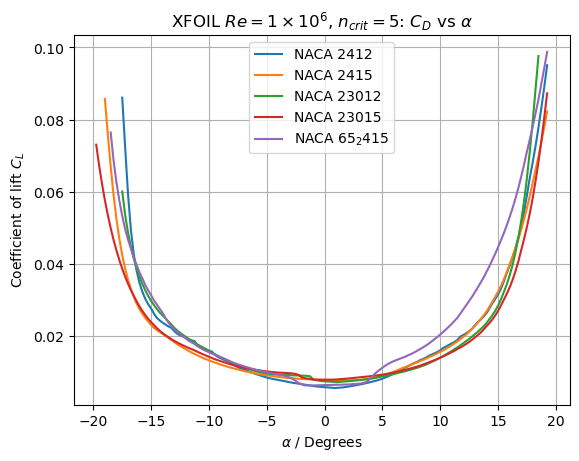

In [38]:
plt.plot(NACA2412['Alpha'], NACA2412['Cd'], label='NACA 2412')
plt.plot(NACA2415['Alpha'], NACA2415['Cd'], label='NACA 2415')
plt.plot(NACA23012['Alpha'], NACA23012['Cd'], label='NACA 23012')
plt.plot(NACA23015['Alpha'], NACA23015['Cd'], label='NACA 23015')
plt.plot(NACA652415['Alpha'], NACA652415['Cd'], label='NACA 65$_2$415')

plt.title('XFOIL $Re = 1 \\times 10^6$, $n_{crit} = 5$: $C_D$ vs $\\alpha$')
plt.xlabel('$\\alpha$ / Degrees')
plt.ylabel('Coefficient of lift $C_L$')
plt.grid()

#plt.xlim((-0.1, 0.1))
#plt.ylim((0.0,0.01))

plt.legend()

plt.savefig('cD_v_alpha.png', transparent=True, DPI=600)
plt.savefig('cD_v_alpha.pdf', transparent=True)

In [15]:
NACA2412['Cl'][np.argmin(NACA2412['Cd'])]

CL_minCD = [NACA2412['Cl'][np.argmin(NACA2412['Cd'])], \
            NACA2415['Cl'][np.argmin(NACA2415['Cd'])], \
            NACA23012['Cl'][np.argmin(NACA23012['Cd'])], \
            NACA23015['Cl'][np.argmin(NACA23015['Cd'])], \
            NACA652415['Cl'][np.argmin(NACA652415['Cd'])]]

print('CL at CD_min for: NACA 2412 = ', CL_minCD[0])
print('CL at CD_min for: NACA 2415 = ', CL_minCD[1])
print('CL at CD_min for: NACA 23012 = ', CL_minCD[2])
print('CL at CD_min for: NACA 23015 = ', CL_minCD[3])
print('CL at CD_min for: NACA 65(2)415 = ', CL_minCD[4])


CL at CD_min for: NACA 2412 =  0.3469
CL at CD_min for: NACA 2415 =  0.4069
CL at CD_min for: NACA 23012 =  0.2328
CL at CD_min for: NACA 23015 =  0.045
CL at CD_min for: NACA 65(2)415 =  0.1988


/var/folders/l_/9d2vdrhj63n0sgtgpvt0vmgc0000gn/T/ipykernel_97568/1051265604.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('CLonCD_v_alpha.png', transparent=True, DPI=600)


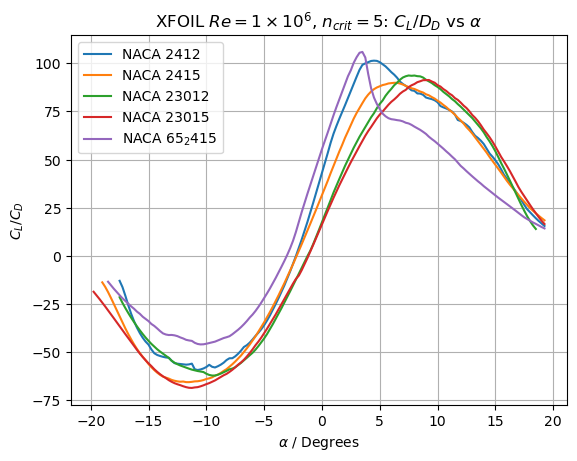

In [9]:
plt.plot(NACA2412['Alpha'], np.divide(NACA2412['Cl'], NACA2412['Cd']), label='NACA 2412')
plt.plot(NACA2415['Alpha'], np.divide(NACA2415['Cl'], NACA2415['Cd']), label='NACA 2415')
plt.plot(NACA23012['Alpha'], np.divide(NACA23012['Cl'], NACA23012['Cd']), label='NACA 23012')
plt.plot(NACA23015['Alpha'], np.divide(NACA23015['Cl'], NACA23015['Cd']), label='NACA 23015')
plt.plot(NACA652415['Alpha'], np.divide(NACA652415['Cl'], NACA652415['Cd']), label='NACA 65$_2$415')

plt.title('XFOIL $Re = 1 \\times 10^6$, $n_{crit} = 5$: $C_L / D_D$ vs $\\alpha$')
plt.xlabel('$\\alpha$ / Degrees')
plt.ylabel('$C_L / C_D$')
plt.grid()

plt.legend()

plt.savefig('CLonCD_v_alpha.png', transparent=True, DPI=600)
plt.savefig('CLonCD_v_alpha.pdf', transparent=True)

In [68]:
LonD_max = [np.max(np.divide(NACA2412['Cl'], NACA2412['Cd'])), np.max(np.divide(NACA2415['Cl'], NACA2415['Cd'])), np.max(np.divide(NACA23012['Cl'], NACA23012['Cd'])), np.max(np.divide(NACA23015['Cl'], NACA23015['Cd'])), np.max(np.divide(NACA652415['Cl'], NACA652415['Cd']) )]

print('LonD_max for: NACA 2412 = ', LonD_max[0])
print('LonD_max for: NACA 2415 = ', LonD_max[1])
print('LonD_max for: NACA 23012 = ', LonD_max[2])
print('LonD_max for: NACA 23015 = ', LonD_max[3])
print('LonD_max for: NACA 65(2)415 = ', LonD_max[4])

LonD_max for: NACA 2412 =  101.38297872340425
LonD_max for: NACA 2415 =  89.89320388349513
LonD_max for: NACA 23012 =  93.68371212121212
LonD_max for: NACA 23015 =  91.3452566096423
LonD_max for: NACA 65(2)415 =  105.91690544412607


In [73]:
C_Di = ( 0.30**2 / ( 10 * np.pi ) ) * 1.0117
print(C_Di)

0.0028983070066692694


In [4]:
import numpy as np

rise = 0.8

run_deg = 73.0 / ( 18.97 / 2) #PPX, 18.97 PPX per degree

run_rad = run_deg*np.pi/180

a_0 = rise/run_rad

print(a_0)

print(a_0/(2*np.pi))

5.955621574592722
0.9478666127811688


### Thin Airfoil Theory Equations

The NACA-23015 name can be decoded as follows:

| Digit | Value | Meaning |
|--|--|--|
|1| 2 | Design $C_L = 0.30$ |
|2| 3 | Maximum Cambre at $15 \%$ Chord |
|3| 0 | Normal (not reflex) Cambre Line |
|4/5| 15 | Maxiumum Thickness is $15 \%$ Chord |

The NACA 5 Digit Series airfoils (without a reflexed cambre line) have their cambre line described by the following equation (where the height is specific to chord lenght):
$$
z_c =
\begin{cases}
    \frac{k}{6} \left( x^3 - 3 r x^2 + r^2 \left( 3 - r \right) x \right), & 0 \leq x < r \\
    \frac{k r^3}{6} \left( 1 - x \right), & r \leq x \leq 1
\end{cases}
$$

$k$ and $r$ are constants that are specific for individual airfoils. In the case of the 23015, $k = 15.957$ and $r = 0.2024$.

Before pluggin these values into Thin Airfoil Theory, we should note that an airfoil with a thickness of $15 \%$ chord is pushing the assumptions of a 'thin' airfoil. The most important test, however, is that $a \approx 2 \pi$, which will be validated as a resonable assumption by both pannel methods (XFOIL) and experimental data (for the 23015, not airfoils of $15 \%$ thickness in general).

Recall the fundamental equations of Thin Airfoil Theory:
$$
c_\ell = 2 \pi \left[ \alpha + \frac{1}{\pi} \int_{0}^{\pi} {\frac{dz}{dx} \left( \cos {\theta}_0 - 1 \right) d {\theta}_0 } \right], 
\qquad 
x = \frac{C}{2} \left( 1 - \cos \theta_0 \right)
$$

Because our expression for $z$ is already $z_C$, we can set $C=1$. The fist step is trivially differentiating $z_C$:

$$
\frac{d z}{dx} = 
\begin{cases}
    \frac{k}{6} \left( 3 x^2 - 6 r x + r^2 \left( 3 - r \right) \right), & 0 \leq x < r \\
     - \frac{k r^3}{6} , & r \leq x \leq 1
\end{cases}
$$

We note that $\theta_0 = \cos^{-1} \left( 1 - 2 x \right)$, and we adjust out integral bounds and substitute $\theta_0$ into our expression for $\frac{d z}{dx}$:

$$
\begin{array}{lr}
   x = 0 \implies \theta_0 = \cos^{-1} \left( 1 \right) = 0 \\
   x = r \implies \theta_0 = \cos^{-1} \left( 1 - 2 r \right) \equiv r' \\
   x = 1 \implies \theta_0 = \cos^{-1} \left( -1 \right) = \pi
\end{array}
$$
$$
\therefore \frac{d z}{dx} = 
\begin{cases}
    \frac{k}{6} \left( 3 \left( \frac{1}{2} \left( 1 - \cos \theta_0 \right) \right)^2 - 6 r \left( \frac{1}{2} \left( 1 - \cos \theta_0 \right) \right) + r^2 \left( 3 - r \right) \right), & 0 \leq \theta_0 < r' \\
    - \frac{k r^3}{6} , & r' \leq \theta_0 \leq \pi
\end{cases}
$$
$$
=
\begin{cases}
    \frac{k}{8} \left( 1 - \cos \theta_0 \right)^2 - \frac{k r}{2} \left( 1 - \cos \theta_0 \right) + \frac{k r^2}{6} \left( 3 - r \right), & 0 \leq \theta_0 < r' \\
    - \frac{k r^3}{6} , & r' \leq \theta_0 \leq \pi
\end{cases}
$$

Now we can plug this into our fundamental thin airfoil equation:

$$
c_\ell = 2 \pi \left[ \alpha + \frac{1}{\pi} \int_{0}^{\pi} {\frac{dz}{dx} \left( \cos {\theta}_0 - 1 \right) d {\theta}_0 } \right], 
$$

$$
= 2 \pi \left[ \alpha +

\frac{1}{\pi} \int_{0}^{r'} \left[ \frac{k}{8} \left( 1 - \cos \theta_0 \right)^2 - \frac{k r}{2} \left( 1 - \cos \theta_0 \right) + \frac{k r^2}{6} \left( 3 - r \right) \right] \left( \cos {\theta}_0 - 1 \right) d {\theta}_0 
+ 
\frac{1}{\pi} \int_{r'}^{\pi} \left[ - \frac{k r^3}{6} \right] \left( \cos {\theta}_0 - 1 \right) d {\theta}_0 

\right],
$$
$$

= 2 \pi \alpha

+ \int_{0}^{r'} \frac{k}{4} \left( \cos {\theta}_0 - 1 \right)^3 + k r \left( \cos {\theta}_0 - 1 \right)^2
+ \frac{k r^2}{6} \left( 3 - r \right) \left( \cos {\theta}_0 - 1 \right) d \theta_0

- \int_{r'}^{\pi} \frac{k r^3}{3} \left( \cos {\theta}_0 - 1 \right) d {\theta}_0

$$

This can't be easily simplified further (it can be done, but it gets large quickly). We will use computational methods in a CAS (Computer Algebraic System) package to evaluate this integral for the NACA 23015. I decided to use MATHEMATICA, but I checked the result in Maple. MATHEMATICA yields:

$$

c_\ell \left( \alpha \right) = 2 \pi \alpha + 0.159527

$$

The the purposes of auditability, the MATHEMATICA code is included here:

>TAFT[\[Alpha], r_, k_] := 2 * \[Pi] * \[Alpha] + Integrate[k/4*(Cos[\[Theta]] - 1)^3 + k*r*(Cos[\[Theta]] - 1)^2 + (k*r^2)/6*(3 - r)*(Cos[\[Theta]] - 1), {\[Theta], 0, ArcCos[1 - 2*r]}] - Integrate[ (k*r^3)/3*(Cos[\[Theta]] - 1), {\[Theta], ArcCos[1 - 2*r], \[Pi]}]

>TAFT[\[Alpha], 0.2025, 15.957]

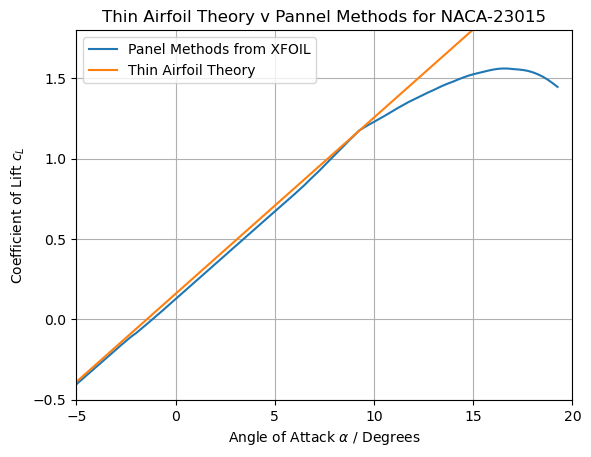

In [8]:
# Thin Airfoil vs Pannel Methods for NACA-23015
import numpy as np
import matplotlib.pyplot as plt

def TAT_23015(alpha):
    return 0.159527 + 2*np.pi*( alpha * np.pi / 180)

plt.plot(NACA23015['Alpha'], NACA23015['Cl'], label='Panel Methods from XFOIL')
plt.plot(NACA23015['Alpha'], TAT_23015(NACA23015['Alpha']), label='Thin Airfoil Theory')

plt.xlim(-5, 20)
plt.ylim(-0.5, 1.8)

plt.grid()
plt.legend()

plt.xlabel('Angle of Attack $\\alpha$ / Degrees')
plt.ylabel('Coefficient of Lift $c_L$')

plt.title('Thin Airfoil Theory v Pannel Methods for NACA-23015')\

plt.savefig('Thin_v_XFOIL_23015.png', transparent=True, dpi=600)
plt.savefig('Thin_v_XFOIL_23015.pdf', transparent=True)

0.0622540800000001


/var/folders/l_/9d2vdrhj63n0sgtgpvt0vmgc0000gn/T/ipykernel_97568/2857598965.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "DPI" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('delta_chart.png', transparent=True, DPI=600)


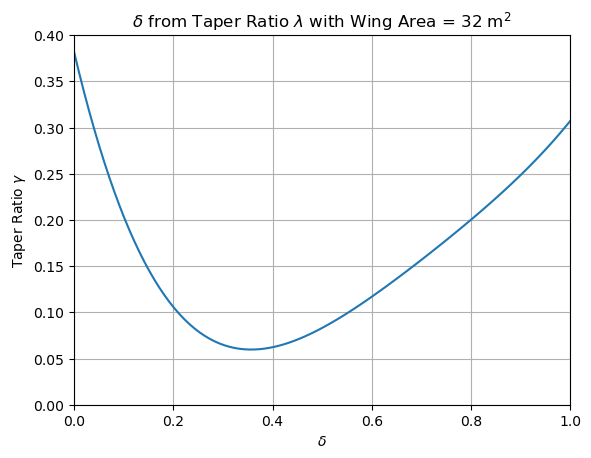

In [28]:
x = np.linspace(0, 1, 100)

def Lambda(l):
    return  32 * ( 0.0524 * np.power(l, 4) - 0.15 * np.power(l, 3) +  0.1659 * np.power(l, 2) - 0.0706*l + 0.0119 )

plt.plot(x, Lambda(x))

plt.xlabel('$\delta$')
plt.ylabel('Taper Ratio $\gamma$')
plt.title('$\delta$ from Taper Ratio $\lambda$ with Wing Area = 32 m$^2$')
plt.grid()

plt.xlim(0,1)
plt.ylim(0,0.4)

plt.savefig('delta_chart.pdf', transparent=True)
plt.savefig('delta_chart.png', transparent=True, DPI=600)

print(Lambda(0.4))

## Question 4

## Question 5

In [24]:
import scipy
from scipy import constants
scipy.constants.g

9.80665